<a href="https://colab.research.google.com/github/Gin-Arata/PCVK_13_Gaco-Razan-Kamil/blob/main/Week9_Tugas_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# @title Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# @title Import Library

import numpy as np
import math
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [6]:
# @title Function konvolusi

def convolution2d(image, kernel, stride, padding):
  # Menambahkan padding pada citra
  if padding > 0:
    image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

  # Inisialisasi ukuran img dan kernel
  img_height, img_width = image.shape
  kernel_height, kernel_width = kernel.shape

  # Melakukan perhitungan ukuran citra output
  output_height = (img_height - kernel_height) // stride + 1
  output_width = (img_width - kernel_width) // stride + 1

  # Melakukan inisialisasi citra output yang baru
  output = np.zeros((output_height, output_width))

  # Melakukan perhitungan kernel terhadap citra
  for i in range(0, output_height):
    for j in range(0, output_width):
      # Menentukan region untuk citra yang ingin dilakukan konvolusi
      region_konvolusi = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]

      # Melakukan perhitungan perkalian wise
      output[i, j] = np.sum(region_konvolusi * kernel)

  return output

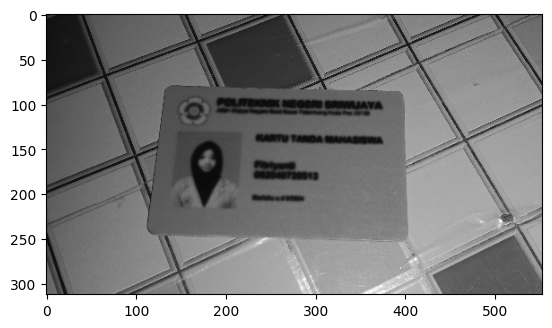

In [7]:
# @title Load image

img = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/3I_2341729016_3 - Fitri yanti.jpg')
img = cv.resize(img, (0, 0), fx=0.2, fy=0.2)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

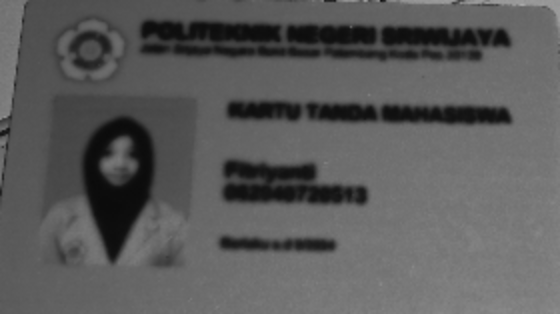

In [9]:
# @title Melakukan cropping image & cvt grayscale

img_crop = img[83:240, 120:400]
img_crop_resize = cv.resize(img_crop, (0, 0), fx=2, fy=2)
cv2_imshow(img_crop_resize)

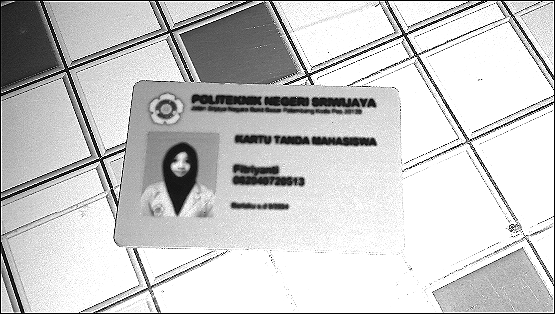

In [10]:
# @title Melakukan sharpening img menggunakan citra asli tanpa cropping

kernel_sharpen = np.array([[0, -1, 0], [-1, 6, -1], [0, -1, 0]])

img_sharpen_ori = convolution2d(img, kernel_sharpen, 1, 2)
img_sharpen_ori = np.clip(img_sharpen_ori, 0, 255).astype('uint8')
cv2_imshow(img_sharpen_ori)

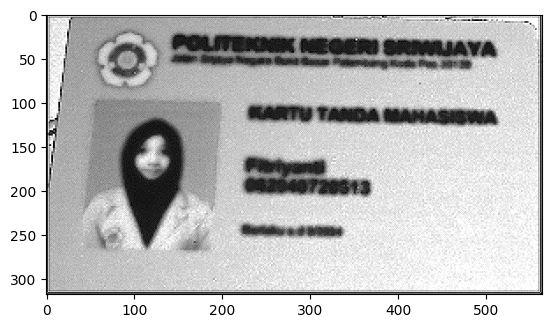

In [12]:
# @title Melakukan sharpening img menggunakan citra yang sudah dilakukan cropping

kernel_sharpen_strong = np.array([[0, -1, 0], [-1, 6, -1], [0, -1, 0]])
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img_sharpen_cropped = convolution2d(img_crop_resize, kernel_sharpen_strong, 1, 2)
img_sharpen_cropped = convolution2d(img_sharpen_cropped, kernel_sharpen, 1, 2)
img_sharpen_cropped = np.clip(img_sharpen_cropped, 0, 255).astype('uint8')
plt.imshow(img_sharpen_cropped, cmap='gray')

In [20]:
# @title Melakukan pemotongan bidang untuk dilakukan morfologi

img_tulisan_politeknik = img_sharpen_cropped[20:70, 130:515]
img_tulisan_ktm = img_sharpen_cropped[95:140, 220:515]
img_tulisan_namaDanNim = img_sharpen_cropped[150:210, 220:380]
img_tulisan_berlaku = img_sharpen_cropped[230:260, 220:350]

Text(0.5, 1.0, 'berlaku')

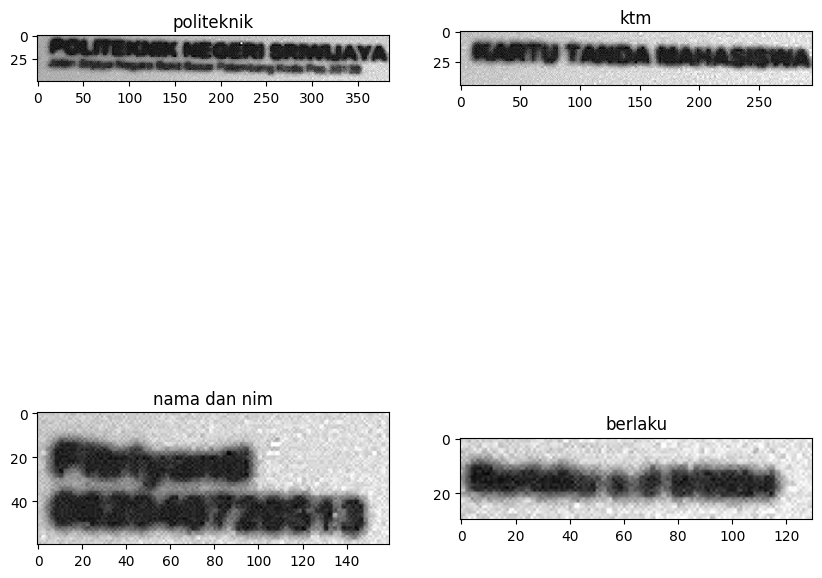

In [21]:
# @title Menampilkan hasil cropping region

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_tulisan_politeknik, cmap='gray')
plt.title('politeknik')
plt.subplot(2, 2, 2)
plt.imshow(img_tulisan_ktm, cmap='gray')
plt.title('ktm')
plt.subplot(2, 2, 3)
plt.imshow(img_tulisan_namaDanNim, cmap='gray')
plt.title('nama dan nim')
plt.subplot(2, 2, 4)
plt.imshow(img_tulisan_berlaku, cmap='gray')
plt.title('berlaku')

In [39]:
# @title Melakukan proses morfologi potongan image

kernel_cross3x3 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
kernel_vertikal3 = np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]], dtype=np.uint8)

img_tulisan_politeknik_morph = cv.erode(img_tulisan_politeknik, kernel_cross3x3)
img_tulisan_ktm_morph = cv.erode(img_tulisan_ktm, kernel_cross3x3)
img_tulisan_namaDanNim_morph = cv.erode(img_tulisan_namaDanNim, kernel_cross3x3)
img_tulisan_berlaku_morph = cv.erode(img_tulisan_berlaku, kernel_cross3x3)

Text(0.5, 1.0, 'berlaku')

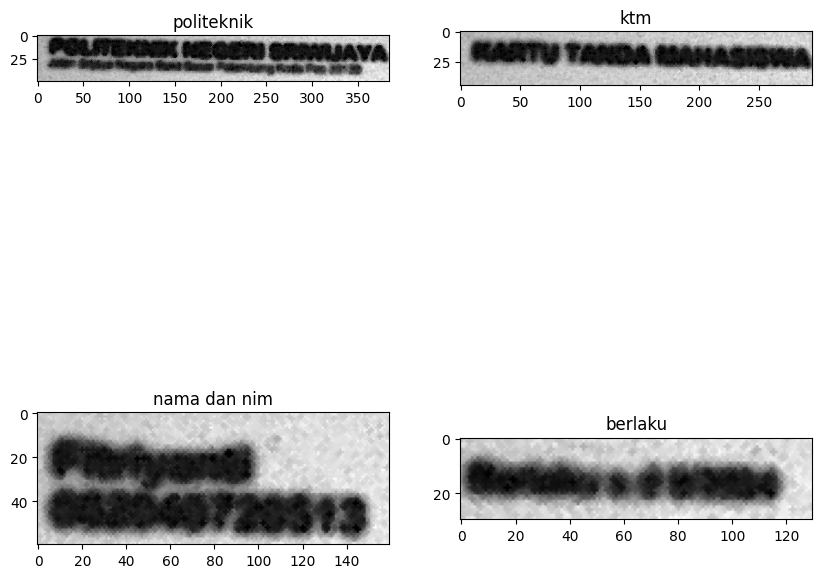

In [40]:
# @title Menampilkan hasil image morfologi erosi

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_tulisan_politeknik_morph, cmap='gray')
plt.title('politeknik')
plt.subplot(2, 2, 2)
plt.imshow(img_tulisan_ktm_morph, cmap='gray')
plt.title('ktm')
plt.subplot(2, 2, 3)
plt.imshow(img_tulisan_namaDanNim_morph, cmap='gray')
plt.title('nama dan nim')
plt.subplot(2, 2, 4)
plt.imshow(img_tulisan_berlaku_morph, cmap='gray')
plt.title('berlaku')

In [42]:
# @title Menggabungkan image hasil potongan ke image utama

img_sharpen_cropped[20:70, 130:515] = img_tulisan_politeknik_morph
img_sharpen_cropped[95:140, 220:515] = img_tulisan_ktm_morph
img_sharpen_cropped[150:210, 220:380] = img_tulisan_namaDanNim_morph
img_sharpen_cropped[230:260, 220:350] = img_tulisan_berlaku_morph

Text(0.5, 1.0, 'hasil akhir')

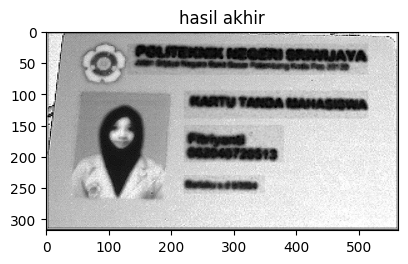

In [43]:
# @title Menampilkan Hasil akhir image

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_sharpen_cropped, cmap='gray')
plt.title('hasil akhir')